In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

Importo y veo Dataset

In [6]:
data = pd.read_csv('dataset_01.csv',sep = ";",na_values=['-1','-2','-3','-4','-5','-6','-7','-8','-10'],skip_blank_lines=True)
data.head(5)

C:\Users\agusr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,235,242,243,253,254,255,256,257) have mixed types.Specify dtype option on import or set low_memory=False.

,ID1,cod_provincia,sector,ambito,claveseccion,idalumno,ap01_01,ap01_02,ap02,ap03,...,trabaja_fuera_hogar_remunerado,migración,edadA_junio2019,sobreedad,infraestructura,iinfraestructura,ap42_01rec,ap42_02rec,ap42_03rec,ap42_04rec
0,120003000120003,2,2,1,02SF00003,3,10,4,1,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2
1,120003000120003,2,2,1,02SF00003,25,7,4,2,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2
2,120003000120003,2,2,1,02SF00002,27,3,5,1,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2
3,120003000120003,2,2,1,02SF00002,3,11,4,2,1,...,3,2,17,1,",218644881556733",2.0,2,2,1,1
4,120003000120003,2,2,1,02SF00003,5,11,4,2,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2


Inspecciono Dataset

In [7]:
#print data properties
print('Data Shape: {}'.format(data.shape))
display(data.describe())
display(data.info())

Data Shape: (343750, 264)


,ID1,cod_provincia,sector,ambito,idalumno,isocioa,iinfraestructura
count,3.437500e+05,343750.000000,343750.000000,343750.000000,343750.000000,323812.000000,281418.000000
mean,4.177331e+14,31.479959,1.382345,1.087953,51.739991,2.035382,-0.719663
std,2.413496e+14,30.151272,0.485961,0.283228,195.380806,0.606623,16.539593
min,3.600800e+13,2.000000,1.000000,1.000000,1.000000,1.000000,-99.000000
25%,2.086500e+14,6.000000,1.000000,1.000000,5.000000,2.000000,2.000000
50%,3.621002e+14,14.000000,1.000000,1.000000,10.000000,2.000000,2.000000
75%,5.960001e+14,54.000000,2.000000,1.000000,17.000000,2.000000,2.000000
max,1.000000e+15,94.000000,2.000000,2.000000,999.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343750 entries, 0 to 343749
Columns: 264 entries, ID1 to ap42_04rec
dtypes: float64(2), int64(5), object(257)
memory usage: 692.4+ MB


None

Dropeo Variables que no me interesan

In [8]:
columns_drop = ['modelo','ponder','lpondera','mpondera','ap33_04bis','ap33_06bis','TEL','TEM','isocioa_puntaje','isocioal_puntaje','isocioam_puntaje','claveseccion','idalumno','ap01_01','ap10','ap11_01','ap11_02','ap11_03','ap11_04','ap11_05','ap11_06','ap11_07','ap12','ap13','ap14_01','ap15','ap18_01','ap18_02','ap18_03','ap19','ap22','ap27_a','ap27_b','ap27_c','ap27_d','ap27_e','ap27_f','ap28_02','ap28_03','ap28_04','ap29_01.dico','ap29_02','ap29_02.dico','ap29_03','ap29_03.dico','ap29_04','ap29_04.dico','ap29_05','ap29_05.dico','ap29_06','ap29_06.dico','ap29_07','ap29_07.dico','ap30','ap31_01','ap31_02','ap31_03','ap31_04','ap31_05','ap31_06','ap32_a','ap32_b','ap32_c','ap32_d','ap32_f','ap33_01bis','ap33_02_a','ap33_02_b','ap33_02bis','ap33_03_a','ap33_03_b','ap33_03bis','ap33_04_a','ap33_04_b','ap33_05bis','ap33_07bis','ap33_08bis','ap33_09bis','ap33_10bis','ap33_11bis','ap35_01','ap35_02','ap35_04','ap35_05','ap36_a','ap36_b','ap36_c','ap36_d','ap36_e','ap36_f','ap37_a','ap37_b','ap37_c','ap37_d','ap37_dicotomica','ap37_e','ap37_f','ap37_g','ap37_h','ap37_i','ap37_j','ap37_k','ap37_l','ap37_m','ap37_n','ap38_a','ap38_b','ap38_c','ap38_d','ap38_e','ap38_f','ap38_g','ap38_h','ap38_i','ap38_j','ap38_k','ap38_l','ap38_m','ap38_n','ap41_01','ap41_02','ap41_03','ap41_04','ap41_05','ap41_06','ap41_07','ap41_08','ap41_09','ap41_10','ap41_11','ap42_01rec','ap42_02','ap42_02rec','ap42_03','ap42_03rec','ap42_04','ap42_04rec','ap43_b','ap43_c','ap43_d','ap43_e','ap43_f','ap43_g','ap43_h','ap44_01','ap44_02','ap44_03','ap44_04','ap44_05','ap45','ap46_01','ap46_02','ap46_03','ap46_04','ap46_05','ap47_01','ap47_02','ap47_03','ap47_04','ap47_05','ap47_06','ap47_07','ap47_08','ap47_09','ap47_10','ap47_11','ap47_12','ap48_a','ap48_b','ap48_c','ap48_d','ap48_e','ap48_f','ap48_g','ap48_h','ap48_i','iinfraestructura','isocioal','isocioam','jardín','repitencia_dicotomica','sobreedad','ap08_a','ap08_b','ap08_c','ap08_d','ap08_e','ap08_f','ap08_g','ap08_h','ap08_i','ap26','ap01_02','ap21','ID1','infraestructura']

datafinal =data.drop(columns_drop, axis=1)

Remplazo valores negativos por positivos para posterior transformacion

In [9]:
datafinal['ap32_e']=datafinal['ap32_e'].replace('-9', '2')
datafinal['ap33_01_a']=datafinal['ap33_01_a'].replace('-9', '2')
datafinal['ap33_01_b']=datafinal['ap33_01_b'].replace('-9', '2')
datafinal['ap43_a']=datafinal['ap43_a'].replace('-9', '2')

In [10]:
datafinal.shape

(343750, 68)

Paso valores negativos del dataset a NaN

In [11]:
Listacolumns = [ 'ap02', 'ap03', 'ap04', 'ap05',
       'ap06', 'ap07', 'ap09', 'ap11_08', 'ap14_02', 'ap16', 'ap17', 'ap23_01',
       'ap23_02', 'ap23_03', 'ap23_04', 'ap23_05', 'ap23_06', 'ap24',
       'ap25_01', 'ap25_02', 'ap25_03', 'ap28_01', 'ap29_01', 'ap32_e',
       'ap33_01_a', 'ap33_01_b', 'ap34', 'ap35_03', 'ap39_01', 'ap39_02',
       'ap39_03', 'ap39_04', 'ap40_01', 'ap40_02', 'ap40_03', 'ap40_04',
       'ap40_05', 'ap40_06', 'ap42_01', 'ap43_a', 'ap49_01', 'ap49_02',
       'ap50_01', 'ap50_02', 'ap50_03', 'ap50_04', 'ap50_05', 'ap51_01',
       'ap51_02', 'ap51_03', 'ap51_04', 'ap51_05', 'ap51_06', 'ap51_07',
       'ap51_08', 'ap51_09', 'ap51_10',
       'ldesemp', 'mdesemp', 'ap26_rec',
       'trabaja_fuera_hogar', 'trabaja_fuera_hogar_remunerado', 'migración',
       'edadA_junio2019']

In [12]:
for columna in Listacolumns:
    datafinal[columna]=datafinal[columna].replace('-9', np.nan)

In [13]:
for columna in Listacolumns:
    datafinal[columna] = pd.to_numeric(datafinal[columna], errors='coerce',downcast='integer')

Miro % de missings

In [14]:
pd.set_option('display.max_rows', 300)
print(datafinal.isna().sum()/len(datafinal)*100)

cod_provincia                      0.000000
sector                             0.000000
ambito                             0.000000
ap02                               2.800291
ap03                               1.923782
ap04                               2.148073
ap05                               3.604655
ap06                               2.643491
ap07                               4.334255
ap09                               3.285527
ap11_08                            6.018618
ap14_02                           14.804945
ap16                               2.652800
ap17                               3.558982
ap23_01                            4.416873
ap23_02                            6.602473
ap23_03                            7.170327
ap23_04                            5.782691
ap23_05                            7.640436
ap23_06                            6.699927
ap24                               3.273309
ap25_01                            9.452509
ap25_02                         

In [15]:
datafinal = datafinal.dropna()

In [16]:
datafinal.shape

(123018, 68)

Armo formatos finales de cada columna

In [17]:
for columna in datafinal.columns:
    datafinal[columna] = datafinal[columna].astype(object)
datafinal['mdesemp'] = datafinal['mdesemp'].astype(int)

In [18]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123018 entries, 0 to 343741
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   cod_provincia                   123018 non-null  object
 1   sector                          123018 non-null  object
 2   ambito                          123018 non-null  object
 3   ap02                            123018 non-null  object
 4   ap03                            123018 non-null  object
 5   ap04                            123018 non-null  object
 6   ap05                            123018 non-null  object
 7   ap06                            123018 non-null  object
 8   ap07                            123018 non-null  object
 9   ap09                            123018 non-null  object
 10  ap11_08                         123018 non-null  object
 11  ap14_02                         123018 non-null  object
 12  ap16                          

In [19]:
# ¿Qué variables están más correlacionadas con el target?
datafinal.corr()

,mdesemp
mdesemp,1.0


Separo X e Y, y armo target de Y (1 si la nota es sobresaliente)

In [20]:
datamate = datafinal.drop(['ldesemp'],axis=1).sample(n=20000,random_state=15)
X = datamate.drop(['mdesemp'],axis=1)

X = pd.get_dummies(X, drop_first=True)
y = datamate.mdesemp.apply(lambda x: 1 if x==4 else 0)

y.value_counts()



0    19146
1      854
Name: mdesemp, dtype: int64

Miro cantidad de columnas dummies

In [21]:
Columnas = X.columns
Columnas

Index(['cod_provincia_6', 'cod_provincia_10', 'cod_provincia_14',
       'cod_provincia_18', 'cod_provincia_22', 'cod_provincia_30',
       'cod_provincia_34', 'cod_provincia_38', 'cod_provincia_42',
       'cod_provincia_46',
       ...
       'migración_1.0', 'migración_2.0', 'migración_9.0',
       'edadA_junio2019_15.0', 'edadA_junio2019_16.0', 'edadA_junio2019_17.0',
       'edadA_junio2019_18.0', 'edadA_junio2019_19.0', 'edadA_junio2019_20.0',
       'edadA_junio2019_21.0'],
      dtype='object', length=306)

Defino funciones para pipelines

In [22]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self
    

In [23]:
class GetDummiesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.get_dummies(X[self.columns], columns = self.columns,dummy_na = True, drop_first= True)
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self


In [24]:
union = make_pipeline(StandardScaler())

union.fit_transform(X)

array([[-0.76053099, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [ 1.31487081, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [-0.76053099, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       ...,
       [-0.76053099, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [ 1.31487081, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [ 1.31487081, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356]])

Separo en train y Test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 306), (5000, 306), (15000,), (5000,))

Utilizo Undersampling para balanceo de clases

In [26]:
from imblearn.under_sampling import RandomUnderSampler


sampler=RandomUnderSampler()
X_train_us,y_train_us=sampler.fit_resample(X_train,y_train)

Pruebo con regresiones logisticas

In [27]:
pipeline = Pipeline([('union', union), 
                     ('clasificador', LogisticRegression(solver='liblinear'))])

parameters = {'clasificador__penalty': ['l1', 'l2'],
              'clasificador__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [28]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=7)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [29]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=5,
             param_grid={'clasificador__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                             1000],
                         'clasificador__penalty': ['l1', 'l2']})

In [30]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.786
Best parameters set:
	 clasificador__C: 0.001
	 clasificador__penalty: 'l2'


In [31]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      4785
           1       0.13      0.80      0.22       215

    accuracy                           0.76      5000
   macro avg       0.56      0.78      0.54      5000
weighted avg       0.95      0.76      0.83      5000

0.7584


Text(33.0, 0.5, 'Reales')

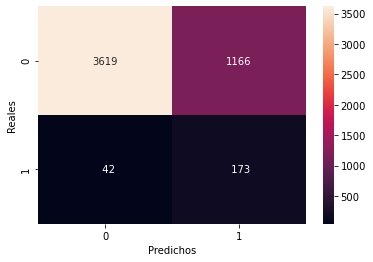

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Probamos con Bayes

In [34]:
pipeline = Pipeline([('union', union), 
                     ('clasificador', GaussianNB())])

parameters = {'clasificador__priors': [None],
              'clasificador__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
                    

In [35]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [36]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador', GaussianNB())]),
             n_jobs=5,
             param_grid={'clasificador__priors': [None],
                         'clasificador__var_smoothing': [1e-08, 1e-09, 1e-08]})

In [37]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.671
Best parameters set:
	 clasificador__priors: None
	 clasificador__var_smoothing: 1e-08


In [38]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.46      0.63      4785
           1       0.07      0.89      0.13       215

    accuracy                           0.48      5000
   macro avg       0.53      0.68      0.38      5000
weighted avg       0.95      0.48      0.61      5000

0.4832


Text(33.0, 0.5, 'Reales')

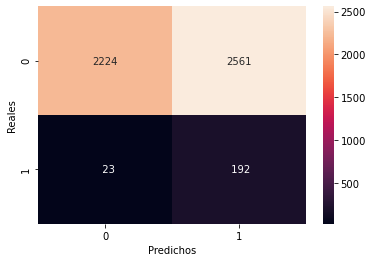

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Probamos con clasificador KNN

In [41]:
pipeline = Pipeline([('union', union), 
                     ('clasificador', GaussianNB())])

parameters = {'clasificador__priors': [None],
              'clasificador__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
                    

In [42]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [43]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador', GaussianNB())]),
             n_jobs=5,
             param_grid={'clasificador__priors': [None],
                         'clasificador__var_smoothing': [1e-08, 1e-09, 1e-08]})

In [44]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.671
Best parameters set:
	 clasificador__priors: None
	 clasificador__var_smoothing: 1e-08


In [45]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.46      0.63      4785
           1       0.07      0.89      0.13       215

    accuracy                           0.48      5000
   macro avg       0.53      0.68      0.38      5000
weighted avg       0.95      0.48      0.61      5000

0.4832


Text(33.0, 0.5, 'Reales')

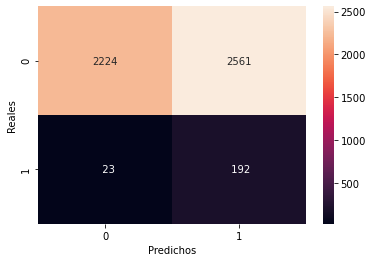

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Probamos con Arbol de Decision

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

pipeline = Pipeline([('union', union), 
                     ('clasificador', DecisionTreeClassifier())])

parameters = {'clasificador__criterion': ['gini', 'entropy'],
          'clasificador__splitter': ['best', 'random'],
          'clasificador__max_depth': [None, 5, 10],
          'clasificador__min_samples_split': [2, 5],
          'clasificador__min_samples_leaf': [1, 2, 3]}
            
    


In [49]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [50]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        DecisionTreeClassifier())]),
             n_jobs=5,
             param_grid={'clasificador__criterion': ['gini', 'entropy'],
                         'clasificador__max_depth': [None, 5, 10],
                         'clasificador__min_samples_leaf': [1, 2, 3],
                         'clasificador__min_samples_split': [2, 5],
                         'clasificador__splitter': ['best', 'random']})

In [51]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.700
Best parameters set:
	 clasificador__criterion: 'gini'
	 clasificador__max_depth: 5
	 clasificador__min_samples_leaf: 3
	 clasificador__min_samples_split: 2
	 clasificador__splitter: 'best'


In [52]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      4785
           1       0.09      0.80      0.16       215

    accuracy                           0.63      5000
   macro avg       0.54      0.71      0.46      5000
weighted avg       0.95      0.63      0.74      5000

0.6276


Text(33.0, 0.5, 'Reales')

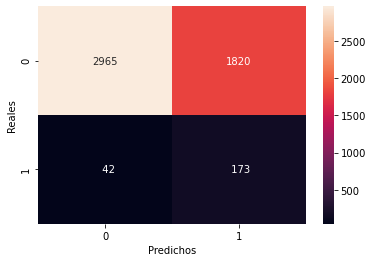

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Probamos con Random Forest

In [55]:
pipeline = Pipeline([('union', union), 
                     ('clasificador',RandomForestClassifier())])

parameters = {'clasificador__n_estimators':[3, 5, 10, 50],
          'clasificador__criterion': ['gini', 'entropy'],
          'clasificador__max_depth': [None, 3, 5],
          'clasificador__min_samples_split': [2,5],
          'clasificador__class_weight':[None, 'balanced']}


                    

In [56]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [57]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'clasificador__class_weight': [None, 'balanced'],
                         'clasificador__criterion': ['gini', 'entropy'],
                         'clasificador__max_depth': [None, 3, 5],
                         'clasificador__min_samples_split': [2, 5],
                         'clasificador__n_estimators': [3, 5, 10, 50]})

In [58]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.774
Best parameters set:
	 clasificador__class_weight: None
	 clasificador__criterion: 'gini'
	 clasificador__max_depth: None
	 clasificador__min_samples_split: 2
	 clasificador__n_estimators: 50


In [59]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      4785
           1       0.13      0.79      0.22       215

    accuracy                           0.76      5000
   macro avg       0.56      0.77      0.54      5000
weighted avg       0.95      0.76      0.83      5000

0.7582


Text(33.0, 0.5, 'Reales')

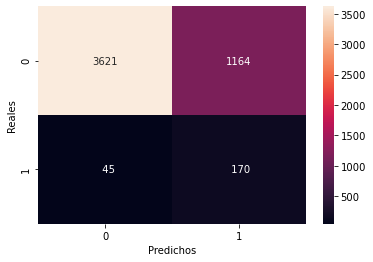

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [62]:
feature_names = grid_search.best_estimator_
feature_names

Pipeline(steps=[('union',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('clasificador', RandomForestClassifier(n_estimators=50))])

Analizo peso de variables en modelo ganador (TOP 50)

In [63]:
import eli5 as eli5

eli5.explain_weights(grid_search.best_estimator_.named_steps['clasificador'], top=50, feature_names=list(X.columns))

Weight,Feature
0.0320 ± 0.0674,ap39_04_4.0
0.0244 ± 0.0638,isocioa_3.0
0.0232 ± 0.0521,ap40_01_4.0
0.0228 ± 0.0495,sector_2
0.0185 ± 0.0507,ap17_6.0
0.0175 ± 0.0449,ap39_04_2.0
0.0158 ± 0.0351,ap24_1.0
0.0157 ± 0.0382,ap16_6.0
0.0148 ± 0.0385,ap14_02_1.0
0.0125 ± 0.0352,ap40_02_4.0


Graficos descriptivos de features

C:\Users\agusr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Desempeño por cuartil en Matematica')

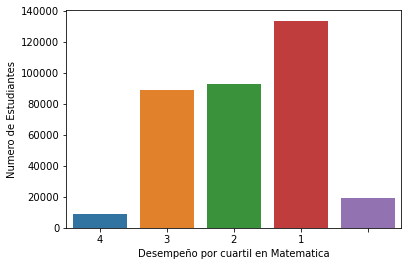

In [64]:
plt.figure()
sns.countplot(data['mdesemp'],label="Count")
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Desempeño por cuartil en Matematica")



C:\Users\agusr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Desempeño por cuartil en Lengua')

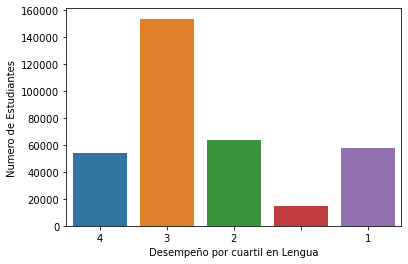

In [65]:
plt.figure()
sns.countplot(data['ldesemp'],label="Count")
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Desempeño por cuartil en Lengua")



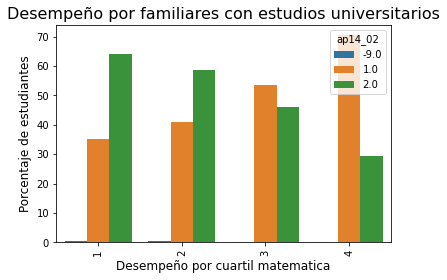

In [83]:
Variable = "ap14_02"
Nombre_del_grafico = "Desempeño por familiares con estudios universitarios"

variable_counts = (datafinal.groupby(['mdesemp'])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x="mdesemp", y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel("Desempeño por cuartil matematica",fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

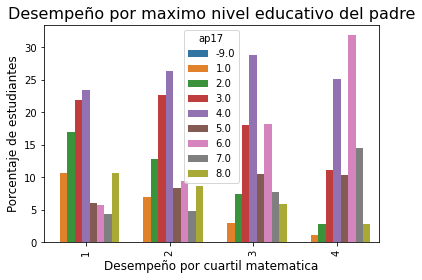

In [84]:
Variable = "ap17"
Nombre_del_grafico = "Desempeño por maximo nivel educativo del padre"

variable_counts = (datafinal.groupby(['mdesemp'])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x="mdesemp", y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel("Desempeño por cuartil matematica",fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

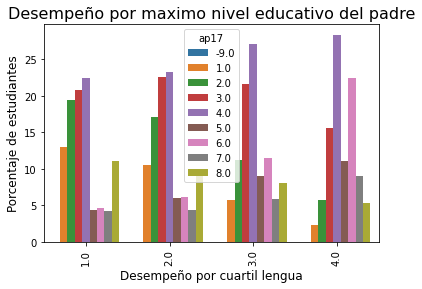

In [85]:
Target = "ldesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil lengua" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "ap17"
Nombre_del_grafico = "Desempeño por maximo nivel educativo del padre"

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

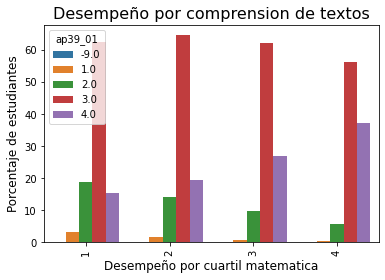

In [88]:

Target = "mdesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil matematica" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "ap39_01"
Nombre_del_grafico = "Desempeño por comprension de textos" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

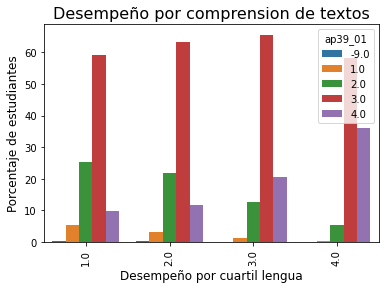

In [87]:

Target = "ldesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil lengua" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "ap39_01"
Nombre_del_grafico = "Desempeño por comprension de textos" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

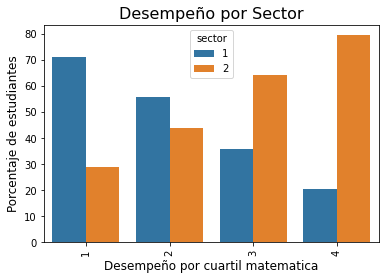

In [90]:
#Desempeño por Sector
#sector

Target = "mdesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil matematica" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "sector"
Nombre_del_grafico = "Desempeño por Sector" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

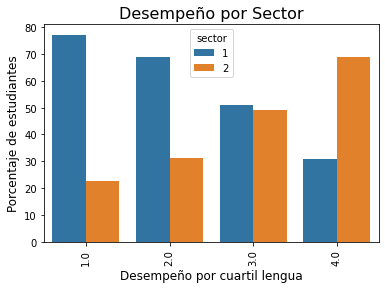

In [91]:
Target = "ldesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil lengua" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "sector"
Nombre_del_grafico = "Desempeño por Sector" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)